In [3]:
# 制作者：
# 代码语言：R
# 内容：基础数据分析图表

library(ggplot2)
library(dplyr)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




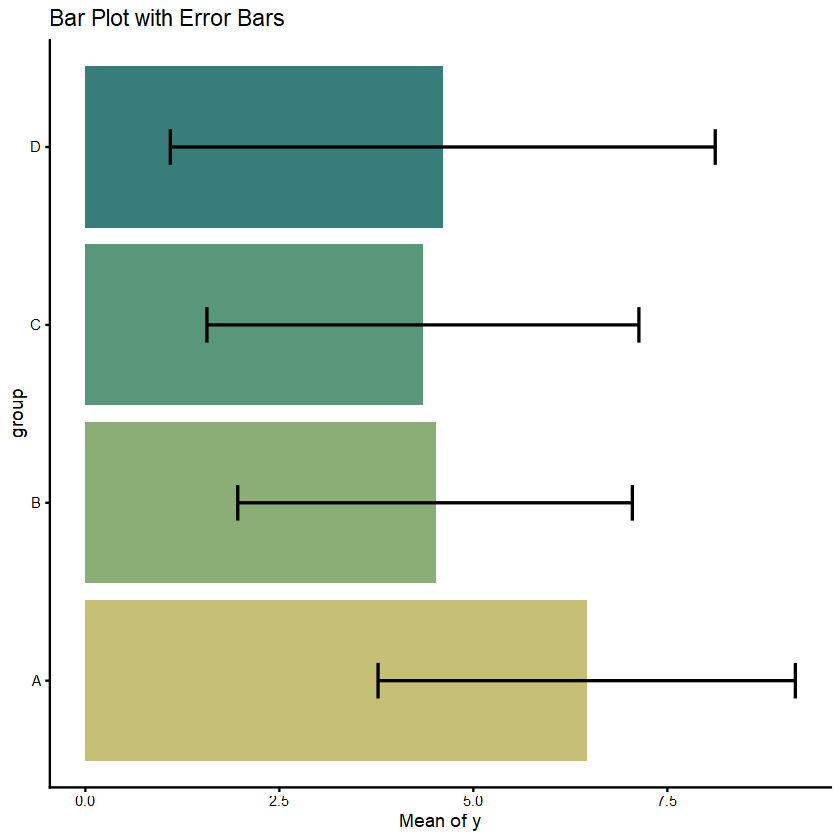

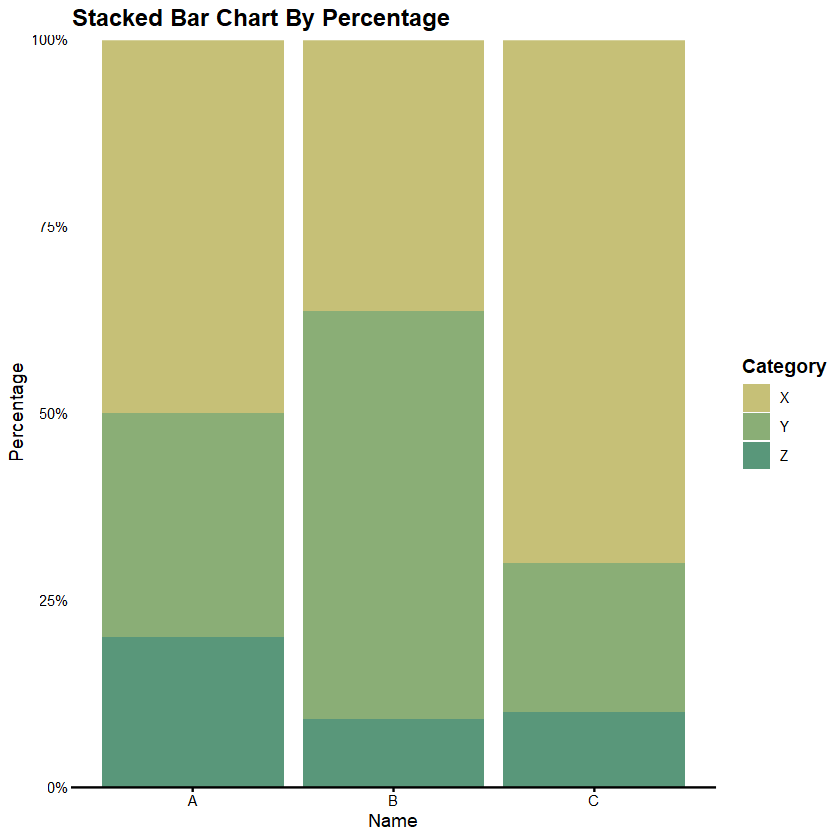

In [ ]:
# =============条形图部分=============
# 适用数据：分组变量 + 数值变量

# ===1. 误差条形图(均值条形图+误差线)===
# 适用：展示各组均值对比，并显示各组数据的离散程度（如标准差、标准误等）
# 适用范例：不同处理组的实验结果对比

data_1 <- data.frame(
  y = runif(100,min=0, max=10),
  group = rep(c("A", "B", "C", "D"), each=25)
)

# 计算每组的均值和标准差
data_summary_1 <- data_1 %>%
  group_by(group) %>%
  summarise(mean_y = mean(y), sd_y = sd(y))
  
# data_bar_summary

# 定义颜色
color <- c("#c6c077", "#8aae76", "#59977a", "#377d79")


p_bar <- ggplot(data_summary_1, aes(x = group, y = mean_y, fill = group)) + # 注意此处x轴为分组变量
    # 绘制条形图
    geom_bar(stat = "identity", position = position_dodge(width = 0.9)) + # 使用identity表示使用数据中的数值绘图而非默认的计数
    # 添加误差线（不需要的话可删除该部分）
    geom_errorbar(
        aes(ymin = mean_y - sd_y, ymax = mean_y + sd_y), # 定义正常数据的 范围
        width = 0.2, # 误差棒顶端横线的宽度
        position = position_dodge(0.9), # 必须与 geom_bar 的 width 保持一致以对齐
        size = 0.7, # 误差棒线条粗细
        color = "black" # 误差棒颜色
    ) +

    # 修改颜色
    scale_fill_manual(values = color) +

    # 主题修饰
    theme_classic() + # 使用经典主题
    labs(
    title = "Bar Plot with Error Bars",
    x = "group",
    y = "Mean of y",
    fill = "group"
    ) +

    theme(legend.position = "none") + # 隐藏图例

    # 水平摆放
    coord_flip()
p_bar


# ===2. 堆积条形图===
# 适用：展示各组内不同类别的组成比例对比（多组定性+一组定量）
# 适用范例：各个家庭中不同类别支出的比例对比

data_2 <- data.frame(
  name = rep(c("A", "B", "C"), each = 3),
  category = rep(c("X", "Y", "Z"), times = 3),
  value = c(5, 3, 2, 4, 6, 1, 7, 2, 1)
)
# data_2

p_stack <- ggplot(data_2, aes(x = name, y = value, fill = category)) +
  # 关键参数: position = "fill"
  # 这会自动将Y轴标准化为 0~1 (即 0%~100%)
  # 如果需要绝对值堆积，将其改为 position = "stack" 即可；若改为dodge则为分组柱状图（组内的列变量是相同的）
  geom_bar(stat = "identity", position = "fill") +
  
  # 修改颜色
  scale_fill_manual(values = color) +
  
  scale_y_continuous(labels = scales::percent, expand = c(0, 0)) + # 使用 scales::percent 将 Y 轴数值转为百分比格式 (0.5 -> 50%)
  
  # 主题与修饰
  theme_classic() +
  labs(
    title = "Stacked Bar Chart By Percentage",
    x = "Name",
    y = "Percentage",
    fill = "Category"
  ) +

  theme(
    plot.title = element_text(face = "bold", size = 14),
    axis.line.y = element_blank(), # 隐藏Y轴线，让百分比看起来更像一个整体块
    axis.ticks.y = element_blank(),
    legend.position = "right",
    legend.title = element_text(face = "bold")
  )
p_stack




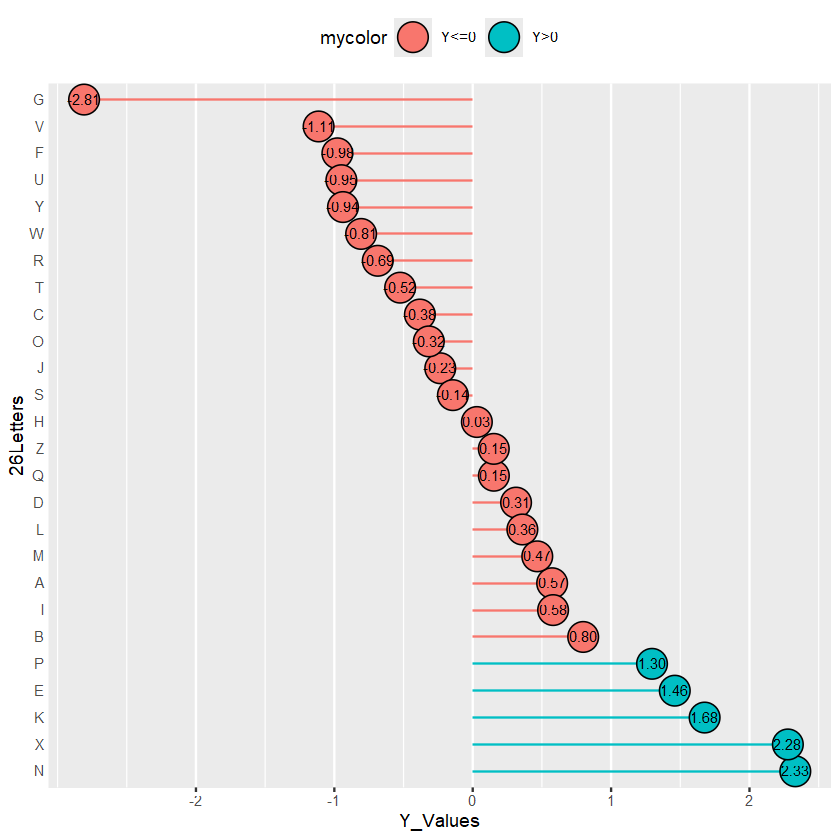

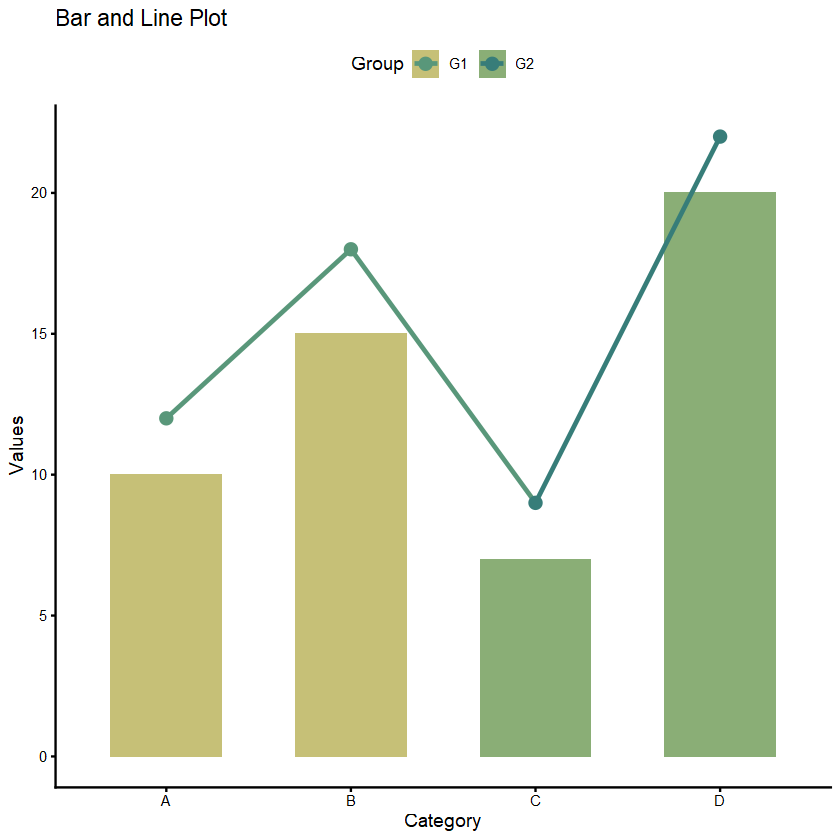

In [ ]:

# ===3. 棒棒糖图===
# 适用：展示各类别的数值分布情况，类似于条形图，但更简洁
# 适用范例：各个类别的评分对比
# 随机构建数据
data3 <- data.frame(xv = LETTERS[1:26],  #x轴：以26个字母作为类别
                   yv = rnorm(26, mean = 0, sd = 1)) #y轴：取26个符合正态分布的随机数
data3 <- data3 %>% 
  mutate(mycolor = ifelse(yv>1, "Y>0", "Y<=0")) #设置分组

fig3 = ggplot(data3, aes(x = xv, y = yv, fill = mycolor)) +
  geom_segment( aes(x=reorder(xv,-yv), xend=reorder(xv,-yv), y=0, yend=yv,color=mycolor), # 线段图
  #geom_segment中的参数用于控制线条相关参数
  #x=xv，xend=xv 表示x轴的线条起始位置x和终止位置xend都是xv（没有线条）
  #类似的，y = 1, yend = yv表示y轴线段起始点为y=1，种植点为每个类别的值即yv
  size=0.5,linetype=1)+#使用reorder()排序变量
  geom_point(size = 8, pch = 21, color="black") +  # 点图
  #在散点上显示数值并保留两位小数
  geom_text(aes(label =sprintf("%.2f",yv)), color = "black", size = 3)+ 
  xlab("26Letters") +
  scale_y_continuous("Y_Values",breaks  =c(-2,-1,0,1,2)) +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(), # 去除横向网格线，只保留纵向网格辅助读数
    panel.border = element_blank(),       # 去除边框
    axis.ticks.y = element_blank(),       # 去除 Y 轴刻度线 (更简洁)
    legend.position = "top"
  )
fig3

# ===4. 带折线条形图===
# 适用：同时展示类别的数值分布和趋势变化
data4 <- data.frame(
  category = c("A", "B", "C", "D"),
  value1 = c(10, 15, 7, 20),
  value2 = c(12, 18, 9, 22),
  group =  c("G1", "G1", "G2", "G2")
)

fig4 <- ggplot(data4, aes(x = category, group = group)) + 
  # A. 绘制分组条形图 (主轴)
  geom_bar(data = data4, 
    aes(x = category, y = value1, fill = group), 
    stat = "identity", 
    position = position_dodge(width = 0.7), # 分组并排
    width = 0.6) +
    geom_line(aes(y = value2, color = group, group = 1), size = 1) +
    geom_point(aes(y = value2, color = group), size = 3, position = position_dodge(width = 0.9)) +
    scale_fill_manual(values = color[0:2]) +
    scale_color_manual(values = color[3:4]) +
    labs(
        title = "Bar and Line Plot",
        x = "Category",
        y = "Values",
        fill = "Group",
        color = "Group"
    ) +
    theme_classic() +
    theme(legend.position = "top")
    
fig4



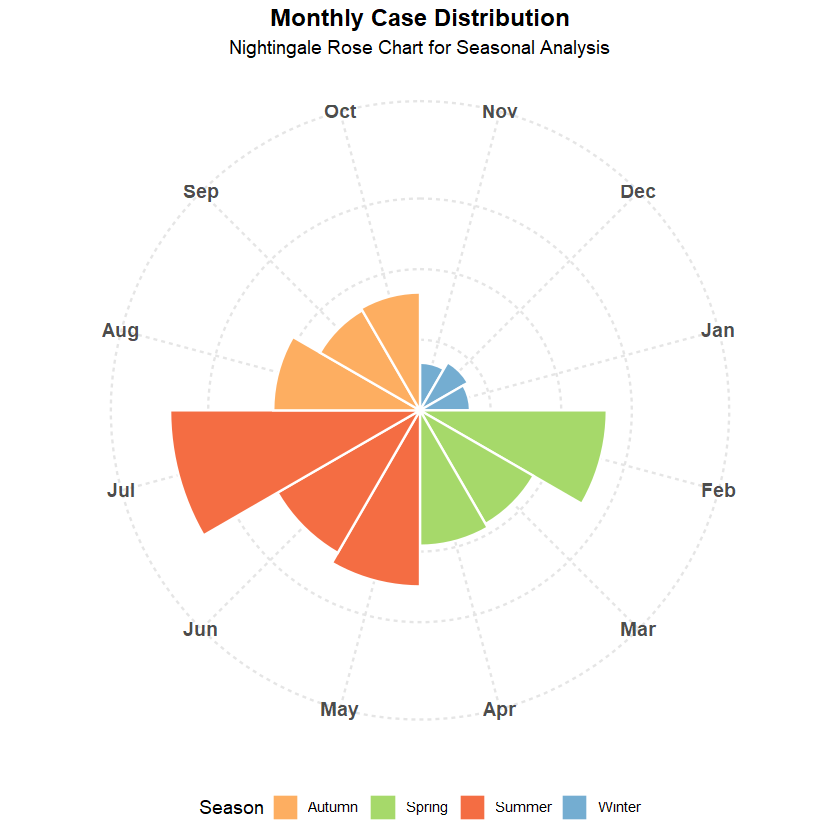

In [59]:
# ===玫瑰图===
# 适用：展示各类别在不同组别中的分布情况，类似于饼图，但更具视觉冲击力（注意通常需要单位一致）
# 适用范例：不同季节的数据分布

df_rose <- data.frame(
  Month = factor(c("Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"),
                 levels = c("Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct")), # 月份顺序
  Value = c(rnorm(3, mean = 5, sd = 2), rnorm(3, mean = 10, sd = 2), rnorm(3, mean = 15, sd = 2), rnorm(3, mean = 10, sd = 2)), # 模拟数值
  Season = rep(c("Winter", "Spring", "Summer", "Autumn"), each = 3) # 添加分组用于着色
)

# 颜色设置
# 为四个季节定义直观的颜色
season_colors <- c(
  "Spring" = "#A6D96A", # 嫩绿
  "Summer" = "#F46D43", # 橙红
  "Autumn" = "#FDAE61", # 金黄
  "Winter" = "#74ADD1"  # 冰蓝
)

fig5 <- ggplot(df_rose, aes(x = Month, y = Value, fill = Season)) +
  
  # A. 基础柱状图
  # width = 1 确保柱子之间没有缝隙，形成连续的扇形
  # color = "white" 添加白色边框，区分每个扇叶
  geom_bar(stat = "identity", width = 1, color = "white") +
  
  # B. 极坐标变换
  # theta = "x" 表示将 x 轴映射为角度
  # start = 0 设置起始角度 (通常 12 点钟方向)
  coord_polar(theta = "x", start = 0) +
  
  # C. 标度设置
  # 使用 scale_y_continuous 控制圆的大小，甚至可以挖空中心 (如果不从0开始)
  scale_y_continuous(limits = c(0, max(df_rose$Value) * 1.1)) + 
  scale_fill_manual(values = season_colors) +
  
  # D. 主题修饰 (关键是去除笛卡尔坐标系的背景)
  theme_minimal() + 
  labs(
    title = "Monthly Case Distribution",
    subtitle = "Nightingale Rose Chart for Seasonal Analysis",
    x = NULL, # 极坐标下通常不需要轴标题
    y = NULL,
    fill = "Season"
  ) +
  theme(
    # 调整网格线颜色，使其在圆形中更柔和
    panel.grid.major = element_line(color = "grey90", linetype = "dashed"),
    
    # 调整坐标轴文字 (月份标签)
    axis.text.x = element_text(size = 11, face = "bold", color = "grey30"),
    
    # 隐藏 Y 轴刻度文字 (通常玫瑰图不强调精确读数，若需要可保留)
    axis.text.y = element_blank(),
    
    # 图例设置
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 0.5)
  )
fig5